# Comparisons between responses, movie-wise

STEP 3:

Movie-wise comparisons between the slope beta estimates for yes, no and unsure responders, earliest timepoint at which responses diverge for each node - plotted across the brain, node timecourses..

In [51]:
# import packages, check folders
#%reset
from pathlib import Path
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [52]:
est_movie_slope = np.load(os.path.join(data_file_loc,'betapermovie_slopereg.npy'))
responses_slopereg = np.load(os.path.join(data_file_loc,'responses_slopereg.npy'))

In [53]:
# Computing t-scores between yes and no responses for each movie and node
nnodes = 268
nmovies = 10
tResp_movie_slope = np.zeros((nnodes,nmovies))
pResp_movie_slope = np.zeros((nnodes,nmovies))
for n in range(nnodes):
    for m in np.arange(nmovies):
        allresp = responses_slopereg[:,m]
        current_node = est_movie_slope[:,m,n]

        if current_node.shape != allresp.shape:
            print('error!')
        
        resp_yes = allresp==1
        resp_no  = allresp==0
        if n+m==0:
            print(len(current_node[resp_yes]))
            print(len(current_node[resp_no]))
        t,p = stats.ttest_ind(current_node[resp_yes],current_node[resp_no])
        tResp_movie_slope[n,m] = t
        pResp_movie_slope[n,m] = p          

978
9


In [54]:
pd.set_option('display.max_colwidth', None) # so columns are not snipped

# loading the Shen atlas labels
shen268 = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
shen268.head()

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.684799999999996], 'name': '92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex'}","{'coords': [9.599999999999994, 17.61882352941177, -19.53411764705882], 'name': '60.56% Subcallosal_Cortex; 38.73% Frontal_Orbital_Cortex'}","{'coords': [5.270633397312864, 35.03262955854126, -17.5278310940499], 'name': '58.54% Frontal_Medial_Cortex; 34.55% Subcallosal_Cortex'}","{'coords': [15.647840531561457, 34.18604651162792, -22.544850498338867], 'name': '54.15% Frontal_Pole; 41.86% Frontal_Orbital_Cortex'}","{'coords': [8.283887468030684, 46.05882352941177, -1.6700767263427139], 'name': '47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole'}","{'coords': [14.581460674157299, 64.75280898876406, 3.682584269662925], 'name': '100.00% Frontal_Pole'}","{'coords': [30.41914191419142, 54.79537953795381, -3.3267326732673297], 'name': '100.00% Frontal_Pole'}","{'coords': [44.469325153374236, 46.095092024539866, -4.917177914110425], 'name': '99.85% Frontal_Pole'}","{'coords': [28.814814814814817, 51.163163163163176, 18.73473473473473], 'name': '100.00% Frontal_Pole'}","{'coords': [8.521081081081078, 53.28, 23.885405405405407], 'name': '48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus'}",...,"{'coords': [-10.399527186761233, 10.877068557919614, -8.056737588652481], 'name': '20.66% Subcallosal_Cortex; 19.95% Left_Putamen; 19.83% Left_Accumbens; 14.40% Left_Caudate; 13.81% no_label; 5.67% Frontal_Orbital_Cortex'}","{'coords': [-14.491582491582491, -3.54882154882155, 20.909090909090907], 'name': '55.03% Left_Caudate; 29.53% Left_Lateral_Ventrical; 11.07% Left_Thalamus'}","{'coords': [-24.77079107505071, 5.537525354969574, -0.07302231237322587], 'name': '96.96% Left_Putamen'}","{'coords': [-9.427230046948353, -25.539906103286384, -1.3755868544600958], 'name': '72.56% Left_Thalamus; 21.40% Brain-Stem; 5.58% no_label'}","{'coords': [-4.68474576271187, -10.2406779661017, 5.877966101694909], 'name': '82.71% Left_Thalamus; 13.90% Left_Lateral_Ventrical'}","{'coords': [-11.407792207792212, -25.563636363636363, 14.883116883116884], 'name': '61.82% Left_Thalamus; 31.43% Left_Lateral_Ventrical'}","{'coords': [-4.821052631578951, -21.51157894736842, -15.890526315789472], 'name': '71.16% Brain-Stem; 25.89% no_label'}","{'coords': [-4.227272727272734, -37.89772727272728, -53.26704545454545], 'name': '100.00% Brain-Stem'}","{'coords': [-6.9375, -33.13068181818181, -39.34659090909091], 'name': '99.15% Brain-Stem'}","{'coords': [-5.697885196374628, -18.966767371601208, -36.81570996978852], 'name': '100.00% Brain-Stem'}"


In [55]:
# Plotting results and picking out maximum T-scores

def plot_figure_maxmin_movie(movie_ind, vidnames,t,p, max_thr=.8, min_thr=.8, plotfig = 0):
    # function to plot significant nodes from a set of t-maps and pvals provided (one for each node) 
    # for movie subscripted as movie_ind
    #max_thr and min_thr set the threshold as max_thr*maxvalue and min_thr*minvalue resp
    # vidnames is a list of all 10 videos
    #movie_ind is the index of the movie we wish to plot

    from nltools.data import Brain_Data
    from nltools.mask import expand_mask, roi_to_brain

    lbl = [str.upper(x[0:4]) for x in vidnames]
    
    m = movie_ind # movienr
    mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
    mask_x = expand_mask(mask)
    t = t[:,m]
    p = p[:,m]
    psig =  np.zeros_like(p)
    psig[p <= 0.05] = 1
    if plotfig == 1:
        tsig = np.multiply(t,psig)
        tsig = np.array(tsig)
        img = roi_to_brain(pd.Series(tsig), mask_x)
        img.plot(colorbar=True, title = [lbl[m] + 'slope'])

    rois = np.where(t>=max_thr*np.max(t)) 
    rois = rois[0]
    roi_lbl = ["" for x in range(len(rois))]
    ind = -1
    for node_nr in rois:
        ind += 1
        roi_lbl[ind] = shen268[str(node_nr+1)][0]
    max_rois_list = pd.DataFrame({'ROIs': rois+1, 'T-scores': t[rois], 'p-values':p[rois], 'ROINames':roi_lbl})
    max_rois_list = max_rois_list.sort_values(by = ['T-scores'],ascending = False)
    max_rois_list = max_rois_list.reset_index()

    rois = np.where(t<=min_thr*np.min(t))
    rois = rois[0]
    roi_lbl = ["" for x in range(len(rois))]
    ind = -1
    for node_nr in rois:
        ind += 1
        roi_lbl[ind] = shen268[str(node_nr+1)][0]
    min_rois_list = pd.DataFrame({'ROIs': rois+1, 'T-scores': t[rois], 'p-values':p[rois], 'ROINames':roi_lbl})
    min_rois_list = min_rois_list.sort_values(by = ['T-scores'],ascending = True)
    min_rois_list = min_rois_list.reset_index()
    min_rois_list
    
    return max_rois_list, min_rois_list

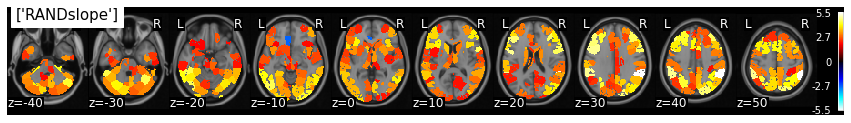

In [56]:
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical", "Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]

movie_ind = 4
max_thr = .8
min_thr = .8
plotfig=1
max_rois_list, min_rois_list =  plot_figure_maxmin_movie(movie_ind, vidnames,tResp_movie_slope,pResp_movie_slope,
                                                  max_thr,min_thr, plotfig)

In [57]:
fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
movieTC = np.load(fileName) # nsubs * nnodes * ntimepts

In [58]:
movieTC.shape

(1049, 268, 43)

In [59]:
def responses_ttest(movie_tc, rois_list, responses, i, comparison):
    #This function performs an unpaired t-test between yes and no for each timepoint of the max or min (max_roi_list)
    # or min_roi_list voxels plotted above
    # i is the row number for the sorted max_rois_list dataframe
    nt = 28
    movie_tc = movie_tc[:,:,:nt]
    allresp = []
    resp_yes = []
    resp_no = []
    allresp = responses[:,movie_ind]
    resp_yes = allresp==1
    resp_no  = allresp==0
    resp_unsure = allresp==9
    
    if comparison == 1:
        v1 = resp_yes
        v2 = resp_no
    elif comparison == 2:
        v1 = resp_yes
        v2 = resp_unsure
    elif comparison == 3:
        v1 = resp_unsure
        v2 = resp_no
    
    nt = movie_tc.shape[2]
    tscore = np.zeros((nt,))
    pval = np.zeros((nt,))-1
    
    if i < len(rois_list):
        node = rois_list.sort_values(by = ['T-scores'],ascending = False).iloc[i,:]['ROIs']
        #print(node)
        node_ind = node - 1 # since indexing starts from 0
        for imno in range(nt): #time
            t,p = stats.ttest_ind(movie_tc[v1,node_ind,imno],movie_tc[v2,node_ind,imno])
            tscore[imno] = t
            pval[imno] = p
    else:
        print('too few rois'+str(len(max_rois_list)))

    return tscore, pval

In [60]:
timepts_indiv_movie, reg_all, reg_conv_all, respreg_all, respreg_conv_all = pickle.load(open(os.path.join(data_file_loc,'movie_wise_regs_windows.p'),"rb"))
# load regs
# each is a list of 10: each element a timecourse

In [61]:
# plot yes vs no timecourses for the peak nodes

def plot_responses_timecourse(movie_ind,responses, rois_list, movie_tc,ttype): 
    # rois_list = can be max_roi_list or min_roi_list for movie movie_ind
    ncol=4
    allresp = []
    resp_yes = []
    resp_no = []
    allresp = responses[:,movie_ind]
    resp_yes = allresp==1
    resp_no  = allresp==0
    resp_unsure  = allresp==9
    
    if ttype == 'Resp':
        n1 = [str(len(np.where(resp_yes)[0])),str(len(np.where(resp_no)[0])),str(len(np.where(resp_unsure)[0]))]
        lbl1 = ['Yes','No', 'Unsure']
        lbl2 = 'Yes-No'
    elif ttype =='Cert':
        n2 = [str(np.where(resp_sure)[0]),str(np.where(resp_unsure)[0])]
        lbl1 = ['Sure','Unsure']
        lbl2 = 'Sure-Unsure'
        
    num_nodes = len(max_rois_list)
    if num_nodes > 3:
        num_nodes = 3
    
    reg = reg_all[movie_ind]
    reg = reg[:28]
    #respreg = respreg_all[movie_ind]
    
    nt = 28
    movie_tc = movie_tc[:,:,:28]
    
    plt.figure(1,figsize = (15,3*num_nodes))
    #print(num_nodes)
    sp = 0 #subplot row
    for node in rois_list['ROIs'].iloc[:num_nodes]:
        sp += 1
        node_ind = node-1 # node is between 1 and 268, movie_tc goes from 0 to 267
        #print(node_ind)
        plt.subplot(num_nodes,ncol,(sp-1)*ncol+1)
        plt.errorbar(x = range(nt),y = np.mean(movie_tc[resp_yes,node_ind,:], axis = 0), 
                     yerr = stats.sem(movie_tc[resp_yes,node_ind,:],axis = 0), color = 'b', label = lbl1[0] + ', n=' + n1[0])
        plt.errorbar(x = range(nt),y = np.mean(movie_tc[resp_no,node_ind,:], axis = 0), 
                     yerr = stats.sem(movie_tc[resp_no,node_ind,:],axis = 0), color = 'r', label = lbl1[1] + ', n=' + n1[1])
        #plt.errorbar(x = range(nt),y = np.mean(movie_tc[resp_unsure,node_ind,:], axis = 0), 
        #             yerr = stats.sem(movie_tc[resp_unsure,node_ind,:],axis = 0), label = ['unsure'])
        plt.hlines(0,0,nt,'k')
        
        #plt.legend(loc = 'lower right')
        plt.axvspan(np.where(reg)[0][0]-1, np.where(reg)[0][-1], color = 'grey', alpha = .2, label = 'vidblock')  #vertical shading
        #plt.axvspan(np.where(respreg)[0][0], np.where(respreg)[0][-1], color = 'red', alpha = .1, label = 'respblock')  #vertical shading
        
        tscore_node = rois_list.loc[rois_list['ROIs']==node,'T-scores']
        tscore_node = np.round(tscore_node.values[0],3)
        plt.title([str.upper(vidnames[movie_ind][:4]),'Node ' + str(node),'T= ' + str(tscore_node)], fontsize = 16)
        plt.ylabel('Norm. BOLD \n activation', fontsize = 16)
        plt.xlabel('Image#', fontsize = 16)
        #plt.ylim(0.1,0.8)

        #tks = np.arange(0,nt,5)-np.where(reg)[0][0]
        #tks = [str(i) for i in tks]
        #plt.xticks(np.arange(0,nt,5),tks)
        
        comparison = 1
        tscore, pval = responses_ttest(movie_tc, rois_list, responses,sp-1, comparison)
        #print(pval)
        pthresh = np.where((pval<.05)&(pval>1e-20))[0]
        plt.vlines(pthresh, -1,1.4, alpha = .2, label = 'p<.05unc.')
        plt.ylim(-0.25,0.6)
        
        if sp == 1:
            plt.legend(loc = 'best')
        
        plt.subplot(num_nodes,ncol,(sp-1)*ncol+2)
        plt.errorbar(x = range(nt),y = np.mean(movie_tc[resp_yes,node_ind,:], axis = 0), 
                     yerr = stats.sem(movie_tc[resp_yes,node_ind,:],axis = 0), color = 'b', label = lbl1[0] + ', n=' + n1[0])
        plt.errorbar(x = range(nt),y = np.mean(movie_tc[resp_unsure,node_ind,:], axis = 0), 
                     yerr = stats.sem(movie_tc[resp_unsure,node_ind,:],axis = 0), color = 'g', label = lbl1[2] + ', n=' + n1[2])
        #plt.errorbar(x = range(nt),y = np.mean(movie_tc[resp_unsure,node_ind,:], axis = 0), 
        #             yerr = stats.sem(movie_tc[resp_unsure,node_ind,:],axis = 0), label = ['unsure'])
        plt.hlines(0,0,nt,'k')
        
        plt.axvspan(np.where(reg)[0][0]-1, np.where(reg)[0][-1], color = 'grey', alpha = .2)  #vertical shading
        #plt.axvspan(np.where(respreg)[0][0], np.where(respreg)[0][-1], color = 'red', alpha = .1)  #vertical shading
        
        comparison = 2
        tscore, pval = responses_ttest(movie_tc, rois_list, responses,sp-1, comparison)
        pthresh = np.where((pval<.05)&(pval>1e-20))[0]
        plt.vlines(pthresh, -1,1.4, alpha = .2, label = 'p<.05unc.')
        plt.ylim(-0.25,0.6)
        
        plt.title([str.upper(vidnames[movie_ind][:4]),'Node ' + str(node),'T= ' + str(tscore_node)], fontsize = 16)
        plt.ylabel('Norm. BOLD \n activation', fontsize = 16)
        plt.xlabel('Image#', fontsize = 16)
        
        if sp == 1:
            plt.legend(loc = 'best')
        
        
        plt.subplot(num_nodes,ncol,(sp-1)*ncol+3)
        plt.errorbar(x = range(nt),y = np.mean(movie_tc[resp_no,node_ind,:], axis = 0), 
                     yerr = stats.sem(movie_tc[resp_yes,node_ind,:],axis = 0), color = 'r', label = lbl1[1] + ', n=' + n1[1])
        plt.errorbar(x = range(nt),y = np.mean(movie_tc[resp_unsure,node_ind,:], axis = 0), 
                     yerr = stats.sem(movie_tc[resp_unsure,node_ind,:],axis = 0), color = 'g', label = lbl1[2] + ', n=' + n1[2])
        #plt.errorbar(x = range(nt),y = np.mean(movie_tc[resp_unsure,node_ind,:], axis = 0), 
        #             yerr = stats.sem(movie_tc[resp_unsure,node_ind,:],axis = 0), label = ['unsure'])
        plt.hlines(0,0,nt,'k')
        
        #plt.legend(loc = 'lower right')
        plt.axvspan(np.where(reg)[0][0]-1, np.where(reg)[0][-1], color = 'grey', alpha = .2)  #vertical shading
        #plt.axvspan(np.where(respreg)[0][0], np.where(respreg)[0][-1], color = 'red', alpha = .1)  #vertical shading
        
        comparison = 3
        tscore, pval = responses_ttest(movie_tc, rois_list, responses,sp-1, comparison)
        pthresh = np.where((pval<.05)&(pval>1e-20))[0]
        plt.vlines(pthresh, -1,1.4, alpha = .2, label = 'p<.05unc.')
        plt.ylim(-0.25,0.6)
        
        plt.title([str.upper(vidnames[movie_ind][:4]),'Node ' + str(node),'T= ' + str(tscore_node)], fontsize = 16)
        plt.ylabel('Norm. BOLD \n activation', fontsize = 16)
        plt.xlabel('Image#', fontsize = 16)
        
        if sp == 1:
            plt.legend(loc = 'best')
        
        plt.subplot(num_nodes,ncol,(sp-1)*ncol+4)
        
        plt.plot(range(nt),np.mean(movie_tc[resp_yes,node_ind,:], axis = 0) 
             - np.mean(movie_tc[resp_no,node_ind,:], axis = 0), label = lbl2)
        plt.plot(range(nt),np.mean(movie_tc[resp_yes,node_ind,:], axis = 0) 
             - np.mean(movie_tc[resp_unsure,node_ind,:], axis = 0), label = 'Yes-Unsure')
        plt.plot(range(nt),np.mean(movie_tc[resp_no,node_ind,:], axis = 0) 
             - np.mean(movie_tc[resp_unsure,node_ind,:], axis = 0), label = 'No-Unsure')
        
        plt.hlines(0,0,nt,'k')
        
        plt.axvspan(np.where(reg)[0][0]-1, np.where(reg)[0][-1], color = 'grey', alpha = .2)  #vertical shading
        #plt.axvspan(np.where(respreg)[0][0], np.where(respreg)[0][-1], color = 'red', alpha = .1)  #vertical shading
        plt.title([str.upper(vidnames[movie_ind][:4]),'Node ' + str(node),'T= ' + str(tscore_node)], fontsize = 16)
        plt.ylabel('Mean BOLD diff', fontsize = 16)
        plt.xlabel('Image#', fontsize = 16)
        plt.ylim(-0.25,0.25)
        
        if sp == 1:
            plt.legend(loc = 'best')
            
    plt.tight_layout()

In [62]:
reg = reg_all[movie_ind]
reg = reg[:28]
len(reg)

28

/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie9.npy


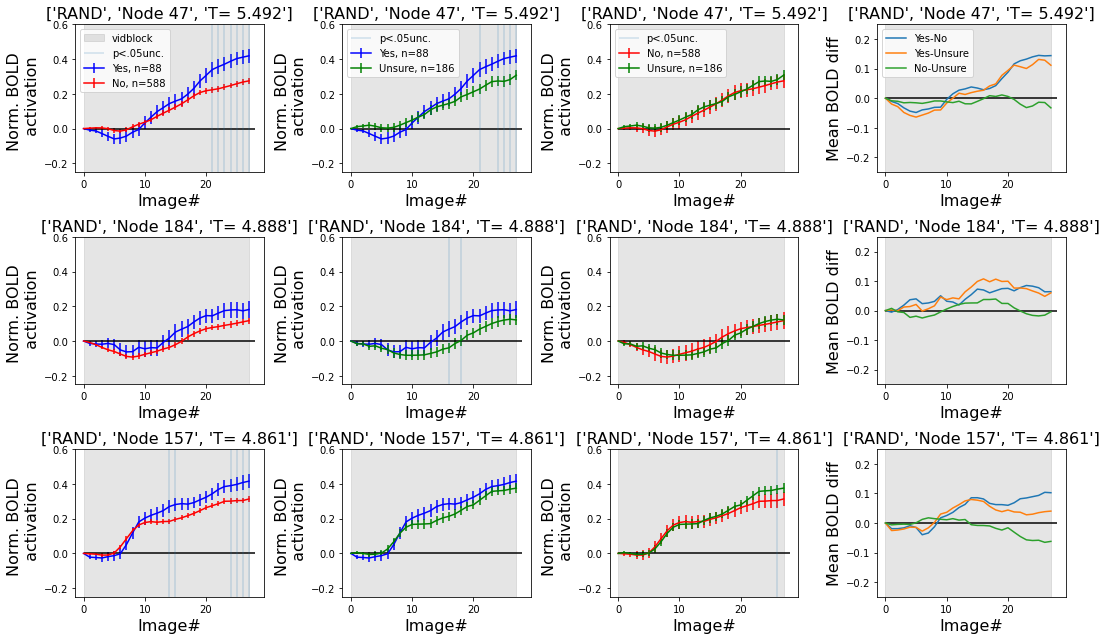

In [63]:
movie_ind = 4
max_thr = .8
min_thr = .8
max_rois_list, min_rois_list =  plot_figure_maxmin_movie(movie_ind, vidnames,tResp_movie_slope,pResp_movie_slope,
                                                  max_thr,min_thr,0)
fileName = os.path.join(data_file_loc,f'timecourse-movie{m}.npy')
print(fileName)
movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
plot_responses_timecourse(movie_ind,responses_slopereg, max_rois_list, movieTC,'Resp')

/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie9.npy


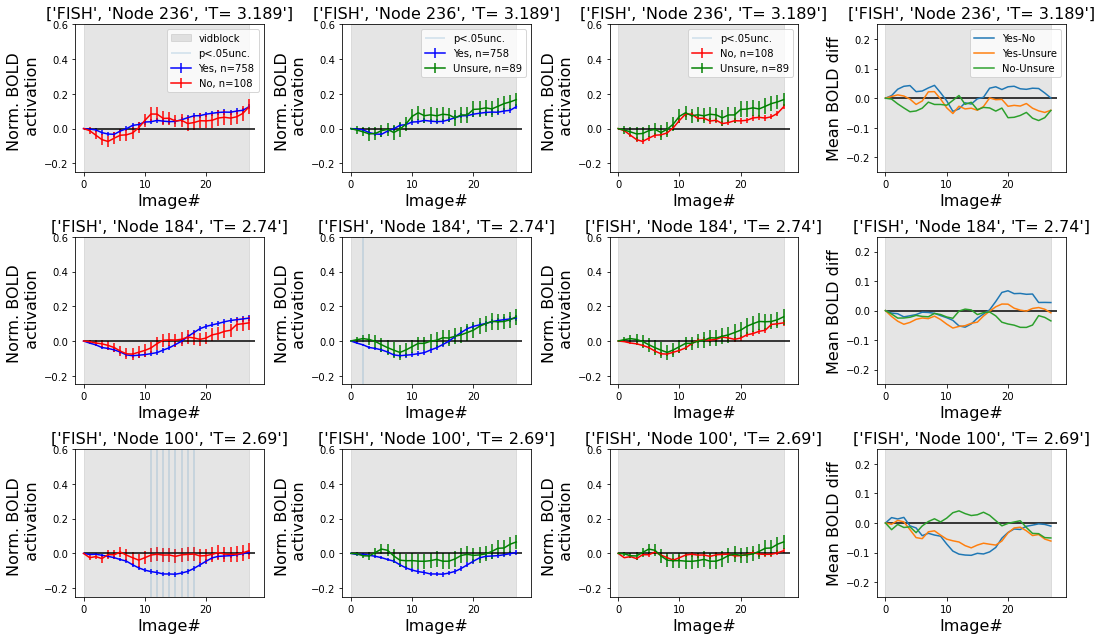

In [64]:
movie_ind = 3
max_thr = .8
min_thr = .8
max_rois_list, min_rois_list =  plot_figure_maxmin_movie(movie_ind, vidnames,tResp_movie_slope,pResp_movie_slope,
                                                  max_thr,min_thr,0)
fileName = os.path.join(data_file_loc,f'timecourse-movie{m}.npy')
print(fileName)
movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
plot_responses_timecourse(movie_ind,responses_slopereg, max_rois_list, movieTC,'Resp')

In [65]:
from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import plot_glass_brain
lbl = [str.upper(x[0:4]) for x in vidnames]

In [66]:
movieTC.shape

(1049, 268, 43)

## Identifying and plotting timecourses of specific nodes/ROIs

In [67]:
dict = eval(shen268['1'][0])
dict

{'coords': [14.083200000000005, 56.6944, -16.684799999999996],
 'name': '92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex'}

In [68]:
dict.keys()

dict_keys(['coords', 'name'])

In [69]:
# Nodes can be viewed here: https://bioimagesuiteweb.github.io/webapp/connviewer.html

# find node with certain phrases
for i in range(268):
    dict = eval(shen268[str(i+1)][0])
    if (dict['name'].find('anterior') != -1) and (dict['name'].find('cingulate') != -1):
        print('node:',i+1, ',name:', dict['name'])

node: 5 ,name: 47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole
node: 15 ,name: 58.36% Cingulate_Gyrus_anterior_division; 41.00% Paracingulate_Gyrus
node: 28 ,name: 41.56% Paracingulate_Gyrus; 27.43% Superior_Frontal_Gyrus; 21.52% Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex); 9.49% Cingulate_Gyrus_anterior_division
node: 83 ,name: 72.92% Cingulate_Gyrus_anterior_division; 26.74% Paracingulate_Gyrus
node: 134 ,name: 60.87% Subcallosal_Cortex; 15.60% Cingulate_Gyrus_anterior_division; 13.04% Paracingulate_Gyrus; 10.23% Frontal_Medial_Cortex
node: 138 ,name: 45.63% Paracingulate_Gyrus; 30.02% Frontal_Medial_Cortex; 17.84% Frontal_Pole; 6.52% Cingulate_Gyrus_anterior_division
node: 140 ,name: 59.08% Paracingulate_Gyrus; 22.05% Cingulate_Gyrus_anterior_division; 14.15% Frontal_Pole
node: 219 ,name: 63.37% Paracingulate_Gyrus; 30.73% Cingulate_Gyrus_anterior_division; 5.90% Superior_Frontal_Gyrus


### Highest Yes-No difference

In [70]:
# identifying maximum activity in brain areas
'''def max_timepoints_nodes(movie_ind,responses_slopereg):
    #movie_ind = 4
    nt = 28

    fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
    movieTC = np.load(fileName) # nsubs * nnodes * ntimepts

    allresp = responses_slopereg[:,movie_ind]
    resp_yes = allresp==1
    resp_no = allresp==0

    tscores = np.zeros((268,28))
    pvals = np.zeros((268,28))

    max_timept = np.zeros((268,8))
    # cols: 1st sig yes time, 1st sig yes mag, 1st sig no time, 1st sig no mag, 
    # 1st sig yes-no time, 1st sig yes-no mag, max sig yes-no time, max sig(yes-no mag)

    for node in range(268):
        #print('node',node)

        for i in range(4): #0: yes, 1: no, 2: yes-no first, 3: yes-no maxt
            if i==0:
                Y = movieTC[resp_yes,node,:nt] # subjects*timepts
            elif i==1:
                Y = movieTC[resp_no,node,:nt] # subjects*timepts
            else:
                Y1 = movieTC[resp_yes,node,:nt]
                Y2 = movieTC[resp_no,node,:nt]

            tscore = np.zeros((nt,))
            pval = np.zeros((nt,))

            if i <= 1:
                for im in np.arange(1,Y.shape[1]):
                    tscore[im],pval[im] = stats.ttest_1samp(Y[:,im],0)
            else:
                for im in np.arange(1,Y1.shape[1]):
                    tscore[im],pval[im] = stats.ttest_ind(Y1[:,im],Y2[:,im], equal_var=False)
            tscores[node,:] = tscore
            pvals[node,:] = pval
            df = pd.DataFrame({'imno': np.arange(0,28),'tscore': tscore,'tscore_mag':np.abs(tscore),
                               'tscore_sign':np.sign(tscore),'pval':pval})
            df = df.loc[(df['tscore_mag']!=0) &(df['pval']<=0.05) &(df['imno']>0),:]

            if len(df):
                if i <= 2:
                    df_sorted = df.sort_values(by = 'imno',ascending = True)
                else:
                    df_sorted = df.sort_values(by = ['tscore_mag','imno'],ascending = False)
                    #print(df_sorted)
                max_timept[node,i*2] = df_sorted['imno'].values[0]
                max_timept[node,(i*2)+1] = df_sorted['tscore'].values[0] 
             
    return max_timept,tscores,pvals'''

"def max_timepoints_nodes(movie_ind,responses_slopereg):\n    #movie_ind = 4\n    nt = 28\n\n    fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')\n    movieTC = np.load(fileName) # nsubs * nnodes * ntimepts\n\n    allresp = responses_slopereg[:,movie_ind]\n    resp_yes = allresp==1\n    resp_no = allresp==0\n\n    tscores = np.zeros((268,28))\n    pvals = np.zeros((268,28))\n\n    max_timept = np.zeros((268,8))\n    # cols: 1st sig yes time, 1st sig yes mag, 1st sig no time, 1st sig no mag, \n    # 1st sig yes-no time, 1st sig yes-no mag, max sig yes-no time, max sig(yes-no mag)\n\n    for node in range(268):\n        #print('node',node)\n\n        for i in range(4): #0: yes, 1: no, 2: yes-no first, 3: yes-no maxt\n            if i==0:\n                Y = movieTC[resp_yes,node,:nt] # subjects*timepts\n            elif i==1:\n                Y = movieTC[resp_no,node,:nt] # subjects*timepts\n            else:\n                Y1 = movieTC[resp_yes,node,:nt]\n   

In [71]:
# identifying maximum activity in brain areas
def max_timepoints_nodes(movie_ind,responses_slopereg):
    #movie_ind = 4
    nt = 28

    fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
    movieTC = np.load(fileName) # nsubs * nnodes * ntimepts

    allresp = responses_slopereg[:,movie_ind]
    resp_yes = allresp==1
    resp_no = allresp==0
    
    # mean yes-no tscores and pvals at each timept for all nodes
    tscores = np.zeros((268,28)) 
    pvals = np.zeros((268,28))

    max_timept_yes = np.zeros((268,4)) # YES: cols: imno 1st sig, tscore 1st sig, imno maxtscore, tscore max 
    max_timept_no = np.zeros((268,4)) # NO: cols: imno 1st sig, tscore 1st sig, imno maxtscore, tscore max
    max_timept_yes_min_no = np.zeros((268,4)) # YES-NO: cols: imno 1st sig, tscore 1st sig, imno maxtscore, tscore max,
    
    for node in range(268):
        #print('node',node)
        for i in range(3): #yes,no,yes-no
            if i == 0: # yes
                Y = movieTC[resp_yes,node,:nt] # subjects*timepts
            elif i == 1: # no
                Y = movieTC[resp_no,node,:nt] # subjects*timepts
            elif i == 2: #yes-no
                Y1 = movieTC[resp_yes,node,:nt] # subjects*timepts
                Y2 = movieTC[resp_no,node,:nt] # subjects*timepts

            tscore = np.zeros((nt,))
            pval = np.zeros((nt,))
            if i <= 1:
                for im in np.arange(1,nt): # no difference at t=0 since baseline-corrected, hence starting at 1
                    tscore[im],pval[im] = stats.ttest_1samp(Y[:,im],0)
            else:
                for im in np.arange(1,nt): # no difference at t=0 since baseline-corrected, hence starting at 1
                    tscore[im],pval[im] = stats.ttest_ind(Y1[:,im],Y2[:,im], equal_var=False)
                tscores[node,:] = tscore
                pvals[node,:] = pval
                
            df = pd.DataFrame({'imno': np.arange(0,nt),'tscore': tscore,'tscore_mag':np.abs(tscore), 
                               'tscore_sign':np.sign(tscore),'pval':pval})
            df = df.loc[(df['tscore_mag']!=0) &(df['pval']<=0.05) &(df['imno']>0),:]

            if len(df):
                for itime,cond in enumerate(['earliest','highest_mag']):
                    if cond == 'earliest':
                        df_sorted = df.sort_values(by = 'imno',ascending = True)
                    elif cond == 'highest_mag':
                        df_sorted = df.sort_values(by = ['tscore_mag','imno'],ascending = False)
                    
                    if i == 0: # yes
                        max_timept_yes[node,itime*2] = df_sorted['imno'].values[0]
                        max_timept_yes[node,(itime*2)+1] = df_sorted['tscore'].values[0] 
                    elif i == 1: # no
                        max_timept_no[node,itime*2] = df_sorted['imno'].values[0]
                        max_timept_no[node,(itime*2)+1] = df_sorted['tscore'].values[0] 
                    elif i == 2: # yes-no
                        max_timept_yes_min_no[node,itime*2] = df_sorted['imno'].values[0]
                        max_timept_yes_min_no[node,(itime*2)+1] = df_sorted['tscore'].values[0] 
        
    return max_timept_yes, max_timept_no, max_timept_yes_min_no, tscores, pvals

Text(0.5, 1.0, 'T-scores (Yes - No)')

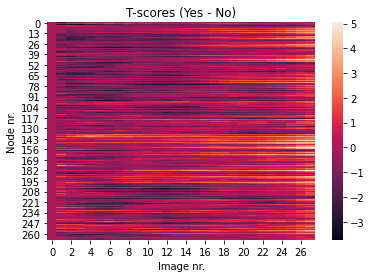

In [72]:
movie_ind = 4
max_timept_yes, max_timept_no, max_timept_yes_min_no, tscores, pvals = max_timepoints_nodes(movie_ind,responses_slopereg)
sns.heatmap(tscores)
plt.xlabel('Image nr.')
plt.ylabel('Node nr.')
plt.title('T-scores (Yes - No)')

In [73]:
max_timept_yes.shape

(268, 4)

### Plot a single node

In [176]:
# plot yes vs no timecourses for the peak nodes

def plot_single_node_tc(movie_ind,responses, node, movie_tc, tscores, firstdiff_line=0, maxdiff_line=0, figtype=0): 
    
    nt = 28 # movie_tc.shape[2]
    movie_tc = movie_tc[:,:,:nt]
    allresp = []
    resp_yes = []
    resp_no = []
    allresp = responses[:,movie_ind]
    resp_yes = allresp==1
    resp_no  = allresp==0
    
    n1 = [str(len(np.where(resp_yes)[0])),str(len(np.where(resp_no)[0]))]
    lbl1 = ['Yes','No']
    lbl2 = 'Yes-No'
    
    plt.figure(1,figsize = (15,10))
    node_ind = node-1 # node is between 1 and 268, movie_tc goes from 0 to 267
    
    plt.subplot(2,1,1)
    if figtype==0:
        print('mean')
        plt.errorbar(x = range(nt),y = np.mean(movie_tc[resp_yes,node_ind,:], axis = 0), 
                 yerr = stats.sem(movie_tc[resp_yes,node_ind,:],axis = 0), color = 'r', label = lbl1[0] + ', n=' + n1[0])
        plt.errorbar(x = range(nt),y = np.mean(movie_tc[resp_no,node_ind,:], axis = 0), 
                 yerr = stats.sem(movie_tc[resp_no,node_ind,:],axis = 0), color = 'b', label = lbl1[1] + ', n=' + n1[1]) 
    elif figtype==1:
        print('median')
        plt.errorbar(x = range(nt),y = np.median(movie_tc[resp_yes,node_ind,:], axis = 0), 
                 yerr = stats.sem(movie_tc[resp_yes,node_ind,:],axis = 0), color = 'r', label = lbl1[0] + ', n=' + n1[0])
        plt.errorbar(x = range(nt),y = np.median(movie_tc[resp_no,node_ind,:], axis = 0), 
                 yerr = stats.sem(movie_tc[resp_no,node_ind,:],axis = 0), color = 'b', label = lbl1[1] + ', n=' + n1[1])
    elif figtype==2: # violinplots yes/no
        print('violinplots yes/no')
        x = np.zeros((int(len(np.where(resp_yes|resp_no)[0])*nt),))
        y = np.zeros_like(x)
        hue = np.zeros_like(x)
        for i,yes_row in enumerate(np.where(resp_yes)[0]):
            rows = np.arange(int(i*nt),int((i+1)*nt))
            x[rows] = np.arange(0,nt)
            y[rows] = movie_tc[yes_row,node_ind,:]
            hue[rows] = 1
        last_ind = rows[-1]
        for i,no_row in enumerate(np.where(resp_no)[0]):
            rows = last_ind+np.arange(int(i*nt),int((i+1)*nt))
            x[rows] = np.arange(0,nt)
            y[rows] = movie_tc[no_row,node_ind,:]
            hue[rows] = -1
        df = pd.DataFrame({'x':x,'y':y,'hue':hue})
        df = df.loc[df['hue']!=0,:]
        df['hue'] = df['hue'].astype(str) 
        df['hue'] = df['hue'].replace(str(1.0),'Yes')
        df['hue'] = df['hue'].replace(str(-1.0),'No')
        sns.violinplot(x= "x", y= "y", hue = "hue", palette = "muted",
                       hue_order = ["No","Yes"], split=False, inner = "quartile", data = df)#, label = lbl1[0] + ', n=' + n1[0])
        #sns.violinplot(x=x, y= y, data = df)#, label = lbl1[0] + ', n=' + n1[0])
    

    plt.hlines(0,0,nt,'k')
    if not(firstdiff_line ==0 and maxdiff_line ==0):
        if figtype < 2:
            plt.vlines(firstdiff_line,-.2,.5, ls = 'dotted', color = 'green',label = 'first diff.')
            plt.vlines(maxdiff_line,-.2,.5, ls = 'dotted', color = 'grey', label = 'max diff')

    
    reg = reg_all[movie_ind]
    #print(reg)
    reg = reg[:28]
    #print(reg)
    #respreg = respreg_all[movie_ind]
    plt.axvspan(np.where(reg)[0][0]-1, np.where(reg)[0][-1], color = 'grey', alpha = .2)#, label = 'vidblock')  #vertical shading
    #plt.axvspan(np.where(respreg)[0][0], np.where(respreg)[0][-1], color = 'red', alpha = .1)#, label = 'respblock')  #vertical shading

    #tks = np.arange(0,nt,5)-np.where(reg)[0][0]
    #tks = [str(i) for i in tks]
    #plt.xticks(np.arange(0,nt,5),tks)
    
    plt.title(str.upper(vidnames[movie_ind][:4])+', node ' + str(node_ind+1), fontsize = 16)
    plt.ylabel('Norm. BOLD \n activation', fontsize = 16)
    plt.xlabel('Image#', fontsize = 16)
    
    #plt.legend(loc = 'lower right')
    if figtype < 2:
        plt.legend(loc = 'best')
    
    plt.subplot(2,1,2)
    #plt.plot(range(nt),np.mean(movie_tc[resp_yes,node_ind,:], axis=0) - np.mean(movie_tc[resp_no,node_ind,:], axis = 0),
    #         label = lbl2)
    
    t = tscores[node_ind,:]
    plt.plot(range(nt),t,label = lbl2)
    plt.hlines(0,0,nt,'k')
    
    plt.axvspan(np.where(reg)[0][0]-1, np.where(reg)[0][-1], color = 'grey', alpha = .2)#, label = 'vidblock')  #vertical shading
    #plt.axvspan(np.where(respreg)[0][0], np.where(respreg)[0][-1], color = 'red', alpha = .1)#, label = 'respblock')  #vertical shading

    #tks = np.arange(0,nt,5)-np.where(reg)[0][0]+1
    #tks = [str(i) for i in tks]
    #plt.xticks(np.arange(0,nt,5),tks)
    plt.ylabel('T-score yes-no')
    plt.title(str.upper(vidnames[movie_ind][:4])+', node ' + str(node_ind+1), fontsize = 16)
    plt.xlabel('Image#', fontsize = 16)
    
    if not(firstdiff_line ==0 and maxdiff_line ==0):
        #plt.vlines(firstdiff_line,-.2,.5, ls = 'dotted', color = 'green',label = 'first diff.')
        #plt.vlines(maxdiff_line,-.2,.5, ls = 'dotted', color = 'grey', label = 'max diff')
        #val = np.mean(movie_tc[resp_yes,node_ind,int(maxdiff_line)]) - np.mean(movie_tc[resp_no,node_ind,int(maxdiff_line)])
        tmax = t[np.where(np.abs(t)==np.max(np.abs(t)))[0]]
        #plt.hlines(tmax,0,nt, ls = 'dashed', color = 'y',label = 'peak diff. ')
    plt.legend(loc = 'lower right')
    #plt.yticks(1.2*min(np.mean(movie_tc[resp_yes,node_ind,:], axis=0)),1.2*max(np.mean(movie_tc[resp_yes,node_ind,:], axis=0)))
    
        
    plt.tight_layout()
    
    return df

### Plotting Yes-No divergence across the brain

/Users/f0053cz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


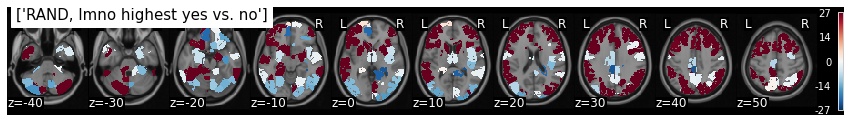

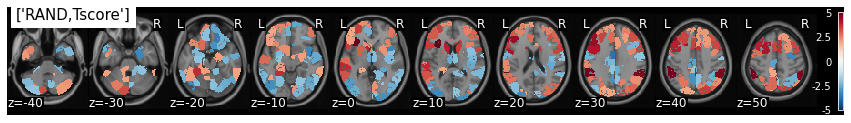

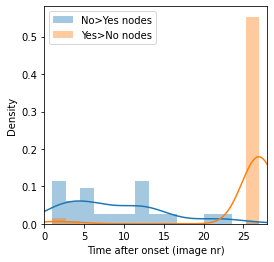

In [53]:
movie_ind = 4

max_timept_yes, max_timept_no, max_timept_yes_min_no, tscores, pvals = max_timepoints_nodes(movie_ind,responses_slopereg)

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)
    
img = roi_to_brain(pd.Series(max_timept_yes_min_no[:,2]*np.sign(max_timept_yes_min_no[:,3])), mask_x) # plot max difference timepoint for each node
# red/blue indicate whether yes>no or yes-no at that timept >0 or <0
# intensity of red/blue indicate whether the activity was early or late 
#(todo: change negative values in the colorbar)
img.plot(colorbar=True, title = [lbl[movie_ind]+', Imno highest yes vs. no'], cmap = 'RdBu_r')

img = roi_to_brain(pd.Series(max_timept_yes_min_no[:,3]), mask_x)
img.plot(colorbar=True, title = [lbl[movie_ind]+',Tscore'], cmap = 'RdBu_r')



signodes = max_timept_yes_min_no[:,2]*np.sign(max_timept_yes_min_no[:,3]) # highest timept * direction (+1 or -1)
earliest_ = np.where(np.abs(signodes) == np.min(np.abs(signodes)))[0]
latest_ = np.where(np.abs(signodes) == np.max(np.abs(signodes)))[0]

plt.figure(3,figsize = (4,4))
sns.distplot(np.abs(signodes[signodes<0]), bins= 15, label = 'No>Yes nodes', norm_hist = False)
sns.distplot(signodes[signodes>0], bins= 15, label = 'Yes>No nodes', norm_hist = False)
plt.xlabel('Time after onset (image nr)')
plt.xlim(0,28)
plt.legend()

/Users/f0053cz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


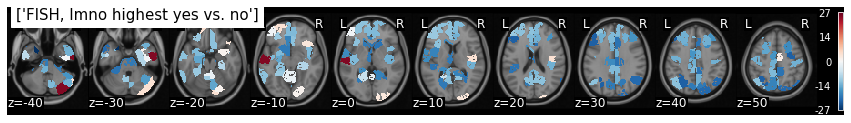

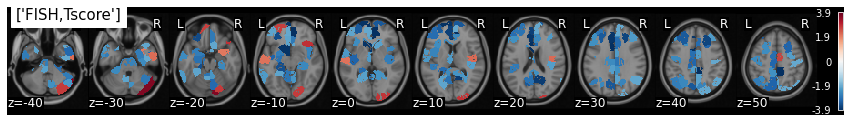

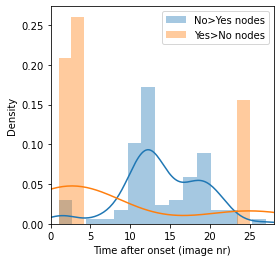

In [54]:
movie_ind = 3

max_timept_yes, max_timept_no, max_timept_yes_min_no, tscores, pvals = max_timepoints_nodes(movie_ind,responses_slopereg)

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)
    
img = roi_to_brain(pd.Series(max_timept_yes_min_no[:,2]*np.sign(max_timept_yes_min_no[:,3])), mask_x) # plot max difference timepoint for each node
# red/blue indicate whether yes>no or yes-no at that timept >0 or <0
# intensity of red/blue indicate whether the activity was early or late 
#(todo: change negative values in the colorbar)
img.plot(colorbar=True, title = [lbl[movie_ind]+', Imno highest yes vs. no'], cmap = 'RdBu_r')

img = roi_to_brain(pd.Series(max_timept_yes_min_no[:,3]), mask_x)
img.plot(colorbar=True, title = [lbl[movie_ind]+',Tscore'], cmap = 'RdBu_r')

signodes = max_timept_yes_min_no[:,2]*np.sign(max_timept_yes_min_no[:,3]) # highest timept * direction (+1 or -1)
earliest_ = np.where(np.abs(signodes) == np.min(np.abs(signodes)))[0]
latest_ = np.where(np.abs(signodes) == np.max(np.abs(signodes)))[0]

plt.figure(3,figsize = (4,4))
sns.distplot(np.abs(signodes[signodes<0]), bins= 15, label = 'No>Yes nodes', norm_hist = False)
sns.distplot(signodes[signodes>0], bins= 15, label = 'Yes>No nodes', norm_hist = False)
plt.xlabel('Time after onset (image nr)')
plt.xlim(0,28)
plt.legend()

### Earliest yes-no divergence

/Users/f0053cz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


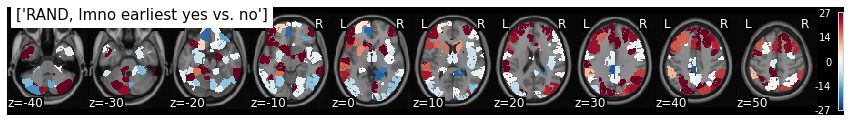

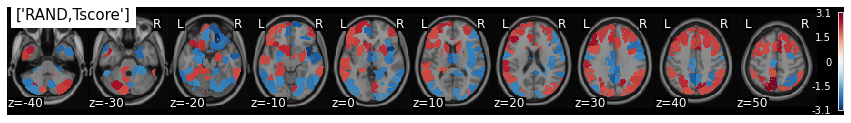

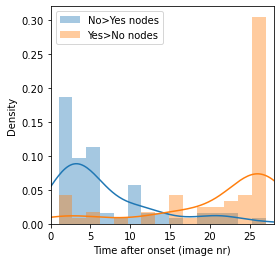

In [64]:
movie_ind = 4

max_timept_yes, max_timept_no, max_timept_yes_min_no, tscores, pvals = max_timepoints_nodes(movie_ind,responses_slopereg)

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)
    
img = roi_to_brain(pd.Series(max_timept_yes_min_no[:,0]*np.sign(max_timept_yes_min_no[:,1])), mask_x) # plot max difference timepoint for each node
# red/blue indicate whether yes>no or yes-no at that timept >0 or <0
# intensity of red/blue indicate whether the activity was early or late 
#(todo: change negative values in the colorbar)
img.plot(colorbar=True, title = [lbl[movie_ind]+', Imno earliest yes vs. no'], cmap = 'RdBu_r')

img = roi_to_brain(pd.Series(max_timept_yes_min_no[:,1]), mask_x)
img.plot(colorbar=True, title = [lbl[movie_ind]+',Tscore'], cmap = 'RdBu_r')



signodes = max_timept_yes_min_no[:,0]*np.sign(max_timept_yes_min_no[:,1]) # earliest timept * direction (+1 or -1)
earliest_ = np.where(np.abs(signodes) == np.min(np.abs(signodes)))[0]
latest_ = np.where(np.abs(signodes) == np.max(np.abs(signodes)))[0]

plt.figure(3,figsize = (4,4))
sns.distplot(np.abs(signodes[signodes<0]), bins= 15, label = 'No>Yes nodes', norm_hist = False)
sns.distplot(signodes[signodes>0], bins= 15, label = 'Yes>No nodes', norm_hist = False)
plt.xlabel('Time after onset (image nr)')
plt.xlim(0,28)
plt.legend()

/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie4.npy
firstdiff_line: 2.0
maxdiff_line: 26.0
violinplots yes/no


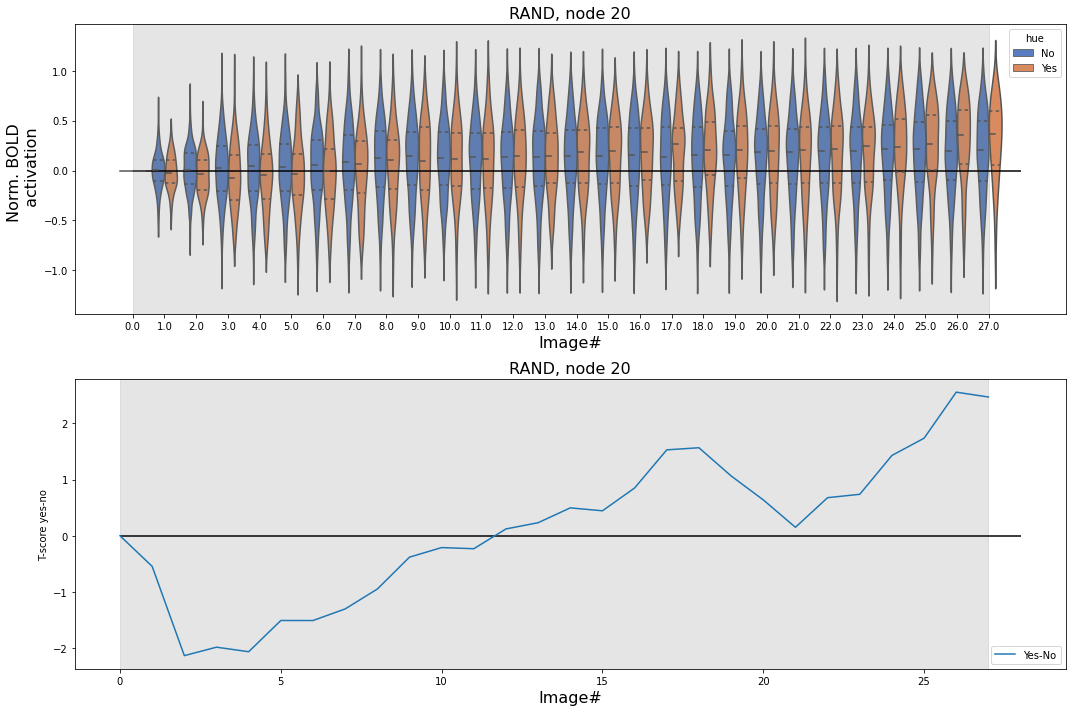

In [177]:
fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
print(fileName)
movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
movieTC = movieTC[:,:,:28]

node_ind = 19
node = node_ind+1
max_timept_yes, max_timept_no, max_timept_yes_min_no, tscores, pvals = max_timepoints_nodes(movie_ind,responses_slopereg)

#cols: imno 1st sig, tscore 1st sig, imno maxtscore, tscore max,

firstdiff_line = max_timept_yes_min_no[node-1,0]
print('firstdiff_line:',firstdiff_line)
maxdiff_line = max_timept_yes_min_no[node-1,2]
print('maxdiff_line:',maxdiff_line)
figtype = 2
df =plot_single_node_tc(movie_ind,responses_slopereg, node, movieTC, tscores, firstdiff_line, maxdiff_line,figtype) 

In [158]:
x= np.unique(df['hue'])

In [161]:
type(x[0])

numpy.float64

In [143]:
print(type(df.hue.values[0]))
df['hue'] = df['hue'].astype(str) 
print(type(df.hue.values[0]))
df.head()


<class 'numpy.float64'>
<class 'str'>


,x,y,hue
0,0.0,0.000000,1.0
1,1.0,-0.258103,1.0
2,2.0,-0.113656,1.0
3,3.0,-0.153236,1.0
4,4.0,0.087858,1.0


In [151]:
np.unique(df['hue'])

array(['No', 'Yes'], dtype=object)

In [150]:
df['hue'] = df['hue'].replace(str(1.0),'Yes')
df['hue'] = df['hue'].replace(str(-1.0),'No')
#print(np.unique(df['hue_int']))

In [146]:
df.head()

,x,y,hue
0,0.0,0.000000,Yes
1,1.0,-0.258103,Yes
2,2.0,-0.113656,Yes
3,3.0,-0.153236,Yes
4,4.0,0.087858,Yes


/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie4.npy
firstdiff_line: 2.0
maxdiff_line: 26.0
43.55% Frontal_Operculum_Cortex; 33.40% Insular_Cortex; 10.36% Inferior_Frontal_Gyrus_pars_triangularis; 6.98% Frontal_Orbital_Cortex; 5.71% Inferior_Frontal_Gyrus_pars_opercularis


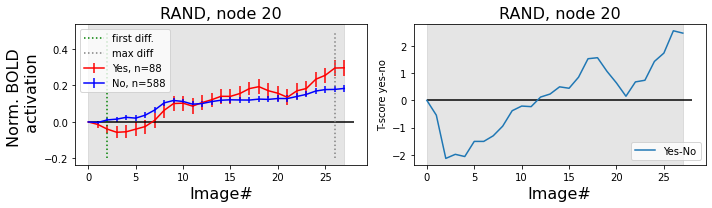

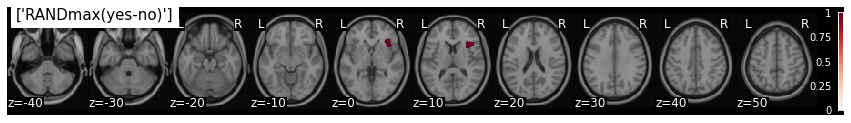

In [63]:
fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
print(fileName)
movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
movieTC = movieTC[:,:,:28]

node_ind = 19
node = node_ind+1
firstdiff_line = max_timept[node-1,4]
print('firstdiff_line:',firstdiff_line)
maxdiff_line = max_timept[node-1,6]
print('maxdiff_line:',maxdiff_line)
plot_single_node_tc(movie_ind,responses_slopereg, node, movieTC, tscores, firstdiff_line, maxdiff_line) 

# Nodes can be viewed here: https://bioimagesuiteweb.github.io/webapp/connviewer.html
dict = eval(shen268[str(node)][0])
print(dict['name'])

mat = np.zeros((268,))
mat[node-1] = 1
img = roi_to_brain(pd.Series(mat), mask_x) # plot max difference timepoint for each node
# red/blue indicate whether yes>no or yes-no at that timept >0 or <0
# intensity of red/blue indicate whether the activity was early or late 
#(todo: change negative values in the colorbar)
img.plot(colorbar=True, title = [lbl[movie_ind]+'max(yes-no)'], cmap = 'RdBu_r')

/Users/f0053cz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


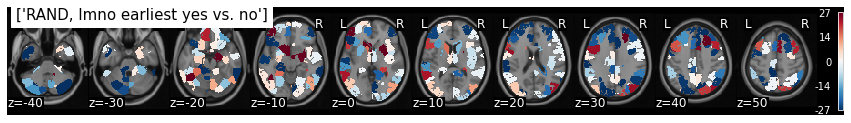

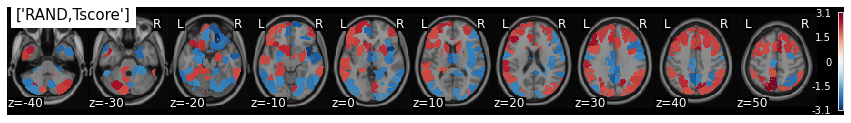

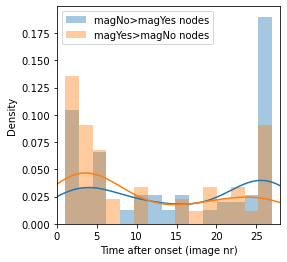

In [16]:
#As can be seen in the figure above, some of the light blue can be ambiguous to interpretation since we don't
# know what drives the yes-no difference. How about we color all nodes where the yes-no
# changes are driven by yes as red and vice versa?

movie_ind = 4

max_timept_yes, max_timept_no, max_timept_yes_min_no, tscores, pvals = max_timepoints_nodes(movie_ind,responses_slopereg)

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)

multiplier = np.zeros((268,))
for node in range(268):
    if np.abs(max_timept_yes[node,1]) > np.abs(max_timept_no[node,1]): # Abs Tscore yes>no
        multiplier[node] = 1
    elif np.abs(max_timept_yes[node,1]) < np.abs(max_timept_no[node,1]): # Abs Tscore no>yes
        multiplier[node] = -1

img = roi_to_brain(pd.Series(max_timept_yes_min_no[:,0]*multiplier), mask_x) # plot max difference timepoint for each node
# red/blue indicate whether yes>no or yes-no at that timept >0 or <0
# intensity of red/blue indicate whether the activity was early or late 
#(todo: change negative values in the colorbar)
img.plot(colorbar=True, title = [lbl[movie_ind]+', Imno earliest yes vs. no'], cmap = 'RdBu_r')

img = roi_to_brain(pd.Series(max_timept_yes_min_no[:,1]), mask_x)
img.plot(colorbar=True, title = [lbl[movie_ind]+',Tscore'], cmap = 'RdBu_r')



signodes = max_timept_yes_min_no[:,0]*multiplier # earliest timept * direction (+1 or -1)
earliest_ = np.where(np.abs(signodes) == np.min(np.abs(signodes)))[0]
latest_ = np.where(np.abs(signodes) == np.max(np.abs(signodes)))[0]

plt.figure(3,figsize = (4,4))
sns.distplot(np.abs(signodes[signodes<0]), bins= 15, label = 'magNo>magYes nodes', norm_hist = False)
sns.distplot(signodes[signodes>0], bins= 15, label = 'magYes>magNo nodes', norm_hist = False)
plt.xlabel('Time after onset (image nr)')
plt.xlim(0,28)
plt.legend()

/Users/f0053cz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/f0053cz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


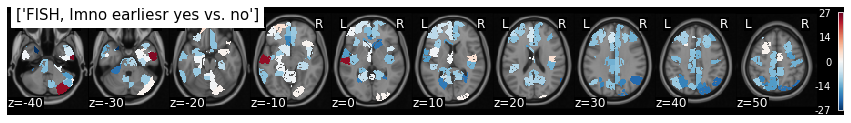

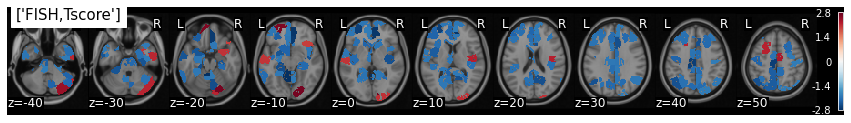

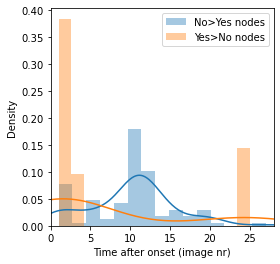

In [56]:
movie_ind = 3

max_timept_yes, max_timept_no, max_timept_yes_min_no, tscores, pvals = max_timepoints_nodes(movie_ind,responses_slopereg)

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)
    
img = roi_to_brain(pd.Series(max_timept_yes_min_no[:,0]*np.sign(max_timept_yes_min_no[:,1])), mask_x) # plot max difference timepoint for each node
# red/blue indicate whether yes>no or yes-no at that timept >0 or <0
# intensity of red/blue indicate whether the activity was early or late 
#(todo: change negative values in the colorbar)
img.plot(colorbar=True, title = [lbl[movie_ind]+', Imno earliesr yes vs. no'], cmap = 'RdBu_r')

img = roi_to_brain(pd.Series(max_timept_yes_min_no[:,1]), mask_x)
img.plot(colorbar=True, title = [lbl[movie_ind]+',Tscore'], cmap = 'RdBu_r')



signodes = max_timept_yes_min_no[:,0]*np.sign(max_timept_yes_min_no[:,1]) # earliest timept * direction (+1 or -1)
earliest_ = np.where(np.abs(signodes) == np.min(np.abs(signodes)))[0]
latest_ = np.where(np.abs(signodes) == np.max(np.abs(signodes)))[0]

plt.figure(3,figsize = (4,4))
sns.distplot(np.abs(signodes[signodes<0]), bins= 15, label = 'No>Yes nodes', norm_hist = False)
sns.distplot(signodes[signodes>0], bins= 15, label = 'Yes>No nodes', norm_hist = False)
plt.xlabel('Time after onset (image nr)')
plt.xlim(0,28)
plt.legend()

In [57]:
signodes = max_timept[:,4]*np.sign(max_timept[:,5])# earliest timept * direction (+1 or -1)
signodes_no0 = signodes[signodes!=0]
signodes_min = np.min(np.abs(signodes_no0))
print(signodes_min)
earliest_ = np.where(np.abs(signodes) == signodes_min)[0]
latest_ = np.where(np.abs(signodes) == np.max(np.abs(signodes)))[0]

print('\nEARLIEST NODE:',earliest_)
for node_ind in  earliest_:
    dict = eval(shen268[str(node_ind +1)][0])
    print(dict['name'])

print('\nLATEST NODE:',latest_)
for node_ind in  latest_:
    dict = eval(shen268[str(node_ind +1)][0])
    print(dict['name'])

1.0

EARLIEST NODE: [  0   3  22  36  42 103 117 163 177 182 224 228]
92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex
54.15% Frontal_Pole; 41.86% Frontal_Orbital_Cortex
59.68% Postcentral_Gyrus; 36.99% Precentral_Gyrus
43.19% Insular_Cortex; 26.90% Right_Putamen; 17.88% Planum_Polare; 11.15% Heschl's_Gyrus_(includes_H1_and_H2)
65.82% Lateral_Occipital_Cortex_superior_division; 19.42% Superior_Parietal_Lobule; 11.12% Angular_Gyrus
61.35% no_label; 38.65% Brain-Stem
100.00% no_label
69.41% Superior_Frontal_Gyrus; 29.41% Middle_Frontal_Gyrus
50.47% Precuneous_Cortex; 44.53% Lateral_Occipital_Cortex_superior_division
54.25% Angular_Gyrus; 17.20% Lateral_Occipital_Cortex_superior_division; 16.45% Supramarginal_Gyrus_posterior_division; 8.92% Middle_Temporal_Gyrus_temporooccipital_part
74.46% Precuneous_Cortex; 25.38% Cingulate_Gyrus_posterior_division
42.71% Left_Lateral_Ventrical; 25.76% Left_Hippocampus; 25.08% Left_Thalamus; 6.44% no_label

LATEST NODE: [ 11  12  14  41  69  78  98  99 

/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie3.npy
firstdiff_line: 0.0
maxdiff_line: 0.0
43.55% Frontal_Operculum_Cortex; 33.40% Insular_Cortex; 10.36% Inferior_Frontal_Gyrus_pars_triangularis; 6.98% Frontal_Orbital_Cortex; 5.71% Inferior_Frontal_Gyrus_pars_opercularis


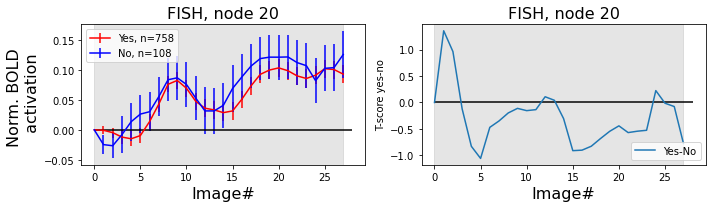

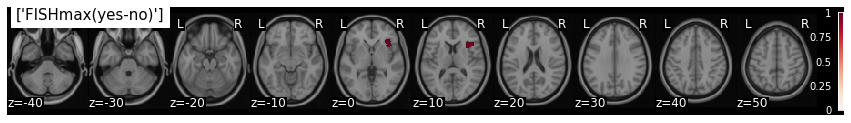

In [422]:
# locating an the ROI on brainmap and timecourses
mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)
    
movie_ind = 3
fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
print(fileName)
movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
movieTC = movieTC[:,:,:28]

node_ind = 19
node = node_ind+1
firstdiff_line = max_timept[node-1,4]
print('firstdiff_line:',firstdiff_line)
maxdiff_line = max_timept[node-1,6]
print('maxdiff_line:',maxdiff_line)
plot_single_node_tc(movie_ind,responses_slopereg, node, movieTC, tscores, firstdiff_line, maxdiff_line) 

# Nodes can be viewed here: https://bioimagesuiteweb.github.io/webapp/connviewer.html
dict = eval(shen268[str(node)][0])
print(dict['name'])

mat = np.zeros((268,))
mat[node-1] = 1
img = roi_to_brain(pd.Series(mat), mask_x) # plot max difference timepoint for each node
# red/blue indicate whether yes>no or yes-no at that timept >0 or <0
# intensity of red/blue indicate whether the activity was early or late 
#(todo: change negative values in the colorbar)
img.plot(colorbar=True, title = [lbl[movie_ind]+'max(yes-no)'], cmap = 'RdBu_r')

number of nodes= 139


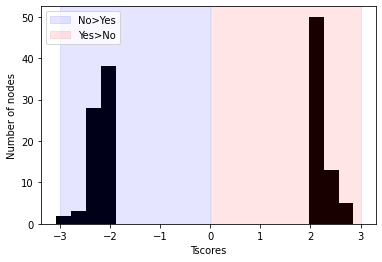

In [319]:
signodes = max_timept[:,4]*np.sign(max_timept[:,5])
plt.hist(max_timept[signodes!=0,5], bins= 20, color = 'k')
print('number of nodes=',len(max_timept[signodes!=0,5]))
plt.ylabel('Number of nodes')
plt.xlabel('Tscores')
plt.axvspan(-3,-0.01, color = 'blue', alpha = .1, label = 'No>Yes')  #vertical shading
plt.axvspan(0.01,3, color = 'red', alpha = .1, label = 'Yes>No')  #vertical shading
plt.legend(loc ='best')

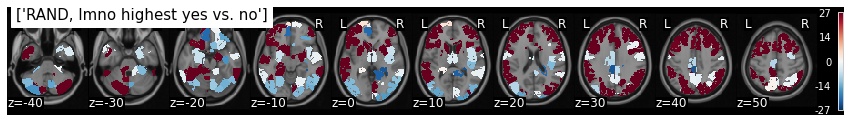

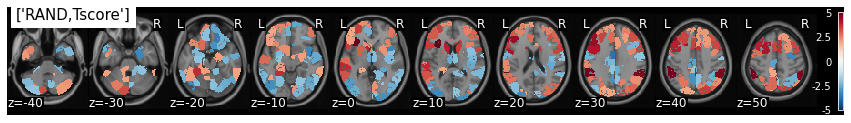

earliest node: 3.0
number of nodes= 131


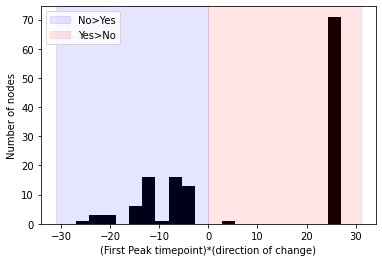

In [235]:
signodes = max_timept[:,6]*np.sign(max_timept[:,7])
signodes = signodes[signodes!=0]
print('earliest node:',np.min(np.abs(signodes)))
print('number of nodes=',len(signodes))
plt.hist(signodes, bins= 20, color = 'k')
plt.ylabel('Number of nodes')
plt.xlabel('(First Peak timepoint)*(direction of change)')
plt.axvspan(-31,-0.01, color = 'blue', alpha = .1, label = 'No>Yes')  #vertical shading
plt.axvspan(0.01,31, color = 'red', alpha = .1, label = 'Yes>No')  #vertical shading
plt.legend(loc ='best')

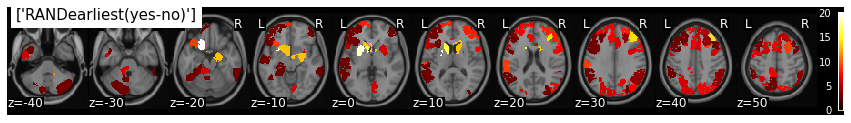

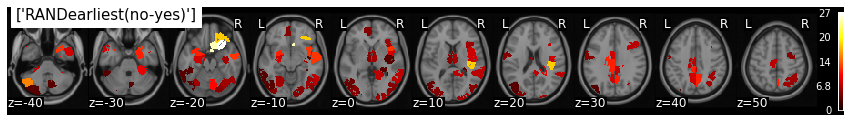

In [237]:
mat = np.zeros_like(max_timept[:,4])
rows = np.where(max_timept[:,5]>0)[0]
mat[rows] = max_timept[rows,2]
img = roi_to_brain(pd.Series(mat), mask_x)
img.plot(colorbar=True, title = [lbl[movie_ind]+'earliest(yes-no)'])

mat = np.zeros_like(max_timept[:,4])
rows = np.where(max_timept[:,5]<0)[0]
mat[rows] = max_timept[rows,2]
img = roi_to_brain(pd.Series(mat), mask_x)
img.plot(colorbar=True, title = [lbl[movie_ind]+'earliest(no-yes)'])

/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie4.npy
41.28% Frontal_Operculum_Cortex; 40.39% Insular_Cortex; 12.28% Frontal_Orbital_Cortex; 5.69% Inferior_Frontal_Gyrus_pars_triangularis


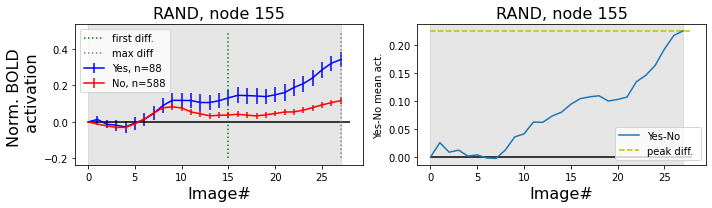

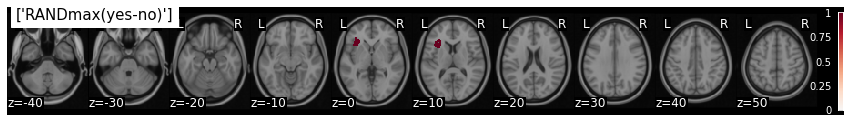

In [212]:
# locating an the ROI on brainmap and timecourses
mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)
    
movie_ind = 4
fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
print(fileName)
movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
movieTC = movieTC[:,:,:31]

node = np.where(np.abs(max_timept[:,7]) == np.max(np.abs(max_timept[:,7])))[0][-1]+1
firstdiff_line = max_timept[node-1,4]
maxdiff_line = max_timept[node-1,6]
plot_single_node_tc(movie_ind,responses_slopereg, node, movieTC, firstdiff_line, maxdiff_line) 

# Nodes can be viewed here: https://bioimagesuiteweb.github.io/webapp/connviewer.html
dict = eval(shen268[str(node)][0])
print(dict['name'])

mat = np.zeros((268,))
mat[node-1] = 1
img = roi_to_brain(pd.Series(mat), mask_x) # plot max difference timepoint for each node
# red/blue indicate whether yes>no or yes-no at that timept >0 or <0
# intensity of red/blue indicate whether the activity was early or late 
#(todo: change negative values in the colorbar)
img.plot(colorbar=True, title = [lbl[movie_ind]+'max(yes-no)'], cmap = 'RdBu_r')


/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie4.npy
92.54% Left_Caudate; 6.22% Left_Lateral_Ventrical


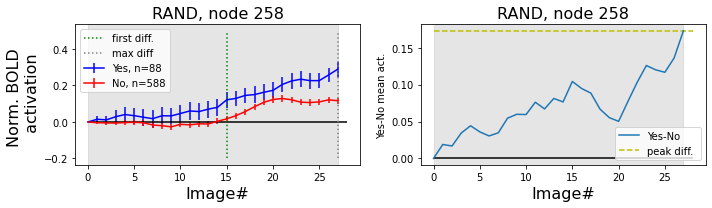

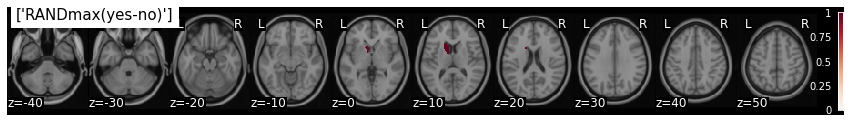

In [190]:
movie_ind = 4
fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
print(fileName)
movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
movieTC = movieTC[:,:,:31]

node = np.where(max_timept[:,4] == 15)[0][-1]+1
firstdiff_line = max_timept[node-1,4]
maxdiff_line = max_timept[node-1,6]
plot_single_node_tc(movie_ind,responses_slopereg, node, movieTC, firstdiff_line,maxdiff_line) 

# Nodes can be viewed here: https://bioimagesuiteweb.github.io/webapp/connviewer.html
dict = eval(shen268[str(node)][0])
print(dict['name'])

mat = np.zeros((268,))
mat[node-1] = 1
img = roi_to_brain(pd.Series(mat), mask_x) # plot max difference timepoint for each node
# red/blue indicate whether yes>no or yes-no at that timept >0 or <0
# intensity of red/blue indicate whether the activity was early or late 
#(todo: change negative values in the colorbar)
img.plot(colorbar=True, title = [lbl[movie_ind]+'max(yes-no)'], cmap = 'RdBu_r')



/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie4.npy
47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole


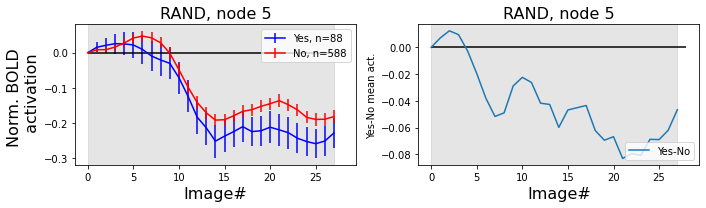

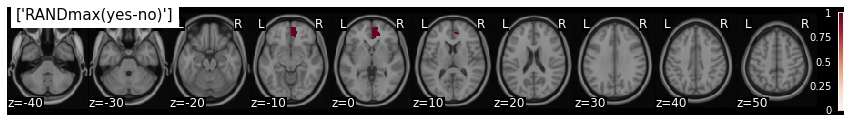

In [192]:
movie_ind = 4
fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
print(fileName)
movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
movieTC = movieTC[:,:,:31]

node = 5
firstdiff_line = max_timept[node-1,4]
maxdiff_line = max_timept[node-1,6]
plot_single_node_tc(movie_ind,responses_slopereg, node, movieTC, firstdiff_line, maxdiff_line) 

# Nodes can be viewed here: https://bioimagesuiteweb.github.io/webapp/connviewer.html
dict = eval(shen268[str(node)][0])
print(dict['name'])

mat = np.zeros((268,))
mat[node-1] = 1
img = roi_to_brain(pd.Series(mat), mask_x) # plot max difference timepoint for each node
# red/blue indicate whether yes>no or yes-no at that timept >0 or <0
# intensity of red/blue indicate whether the activity was early or late 
#(todo: change negative values in the colorbar)
img.plot(colorbar=True, title = [lbl[movie_ind]+'max(yes-no)'], cmap = 'RdBu_r')




In [311]:
# Nodes can be viewed here: https://bioimagesuiteweb.github.io/webapp/connviewer.html
for i in range(268):
    dict = eval(shen268[str(i+1)][0])
    if (dict['name'].find('Superior_Temporal_Gyrus_posterior_division') != -1):
        print('node:',i+1, ',name:', dict['name'], '\n')

node: 46 ,name: 30.14% Parietal_Operculum_Cortex; 28.13% Planum_Temporale; 14.65% Supramarginal_Gyrus_posterior_division; 13.38% Supramarginal_Gyrus_anterior_division; 7.69% Superior_Temporal_Gyrus_posterior_division 

node: 54 ,name: 44.25% Middle_Temporal_Gyrus_posterior_division; 31.27% Superior_Temporal_Gyrus_posterior_division; 19.17% Middle_Temporal_Gyrus_temporooccipital_part; 5.01% Supramarginal_Gyrus_posterior_division 

node: 61 ,name: 24.69% Central_Opercular_Cortex; 18.49% Superior_Temporal_Gyrus_anterior_division; 10.84% Precentral_Gyrus; 10.65% Planum_Temporale; 10.16% Planum_Polare; 9.20% Heschl's_Gyrus_(includes_H1_and_H2); 8.52% Temporal_Pole; 6.00% Superior_Temporal_Gyrus_posterior_division 

node: 63 ,name: 48.90% Middle_Temporal_Gyrus_posterior_division; 46.20% Superior_Temporal_Gyrus_posterior_division 

node: 64 ,name: 44.52% Middle_Temporal_Gyrus_posterior_division; 21.40% Superior_Temporal_Gyrus_anterior_division; 19.42% Middle_Temporal_Gyrus_anterior_division; 

/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data/timecourse-movie4.npy
48.08% Superior_Temporal_Gyrus_posterior_division; 22.93% Planum_Temporale; 21.89% Middle_Temporal_Gyrus_posterior_division; 5.59% Heschl's_Gyrus_(includes_H1_and_H2)


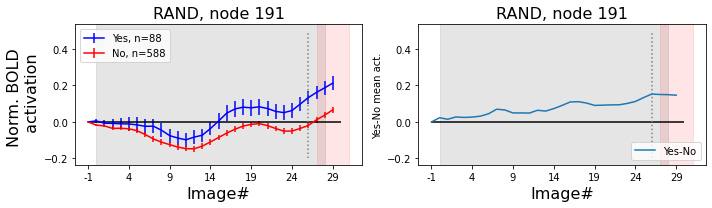

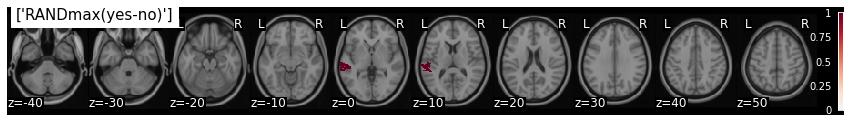

In [312]:
movie_ind = 4
fileName = os.path.join(data_file_loc,f'timecourse-movie{movie_ind}.npy')
print(fileName)
movieTC = np.load(fileName) # nsubs * nnodes * ntimepts
movieTC = movieTC[:,:,:31]

node = 191
maxdiff_line = max_timept[node-1,4]
plot_single_node_tc(movie_ind,responses_slopereg, node, movieTC, maxdiff_line) 

# Nodes can be viewed here: https://bioimagesuiteweb.github.io/webapp/connviewer.html
dict = eval(shen268[str(node)][0])
print(dict['name'])

mat = np.zeros((268,))
mat[node-1] = 1
img = roi_to_brain(pd.Series(mat), mask_x) # plot max difference timepoint for each node
# red/blue indicate whether yes>no or yes-no at that timept >0 or <0
# intensity of red/blue indicate whether the activity was early or late 
#(todo: change negative values in the colorbar)
img.plot(colorbar=True, title = [lbl[movie_ind]+'max(yes-no)'], cmap = 'RdBu_r')

#### following figures are still being worked on

In [238]:
#pip install mplcursors
import mplcursors
plt.isinteractive()
#plt.ioff()
#%matplotlib notebook
#%matplotlib widget
%matplotlib inline

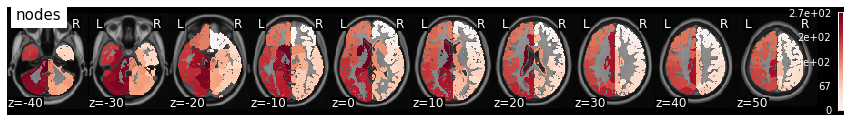

In [239]:
img = roi_to_brain(pd.Series(range(268)), mask_x) # plot max difference timepoint for each node
# red/blue indicate whether yes>no or yes-no at that timept >0 or <0
# intensity of red/blue indicate whether the activity was early or late 
#(todo: change negative values in the colorbar)
img.plot(colorbar=True, title = 'nodes', cmap = 'RdBu_r')
mplcursors.cursor() 